In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
alarms = pd.read_csv('data_files/alarms-240222-010325.csv', sep=';')
alarms

,id,region_id,region_city,all_region,start,end
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19
...,...,...,...,...,...,...
55783,158642,14,Одеська обл.,1,2025-03-01 21:49:30,2025-03-01 23:24:45
55784,158635,9,Київська обл.,1,2025-03-01 22:20:51,2025-03-02 01:38:57
55785,158636,9,Київ,0,2025-03-01 22:52:10,2025-03-02 00:55:18
55786,158617,3,Вінницька обл.,1,2025-03-01 23:26:07,2025-03-02 02:44:07


In [3]:
# regions = pd.read_csv('data_files/regions.csv')
# regions = regions[(regions['region_id'] != 12) & (regions['region_id'] != 1)]
# regions

In [4]:
# alarms = alarms[alarms['region_id'].isin(regions['region_id'])]
alarms = alarms[alarms['region_city'] != 'Крим']
alarms

,id,region_id,region_city,all_region,start,end
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19
...,...,...,...,...,...,...
55783,158642,14,Одеська обл.,1,2025-03-01 21:49:30,2025-03-01 23:24:45
55784,158635,9,Київська обл.,1,2025-03-01 22:20:51,2025-03-02 01:38:57
55785,158636,9,Київ,0,2025-03-01 22:52:10,2025-03-02 00:55:18
55786,158617,3,Вінницька обл.,1,2025-03-01 23:26:07,2025-03-02 02:44:07


In [5]:
# print(alarms.isna().sum())

In [6]:
alarms = alarms.copy()
alarms['start'] = alarms['start'].astype(str).str.strip()
alarms['start'] = pd.to_datetime(alarms['start'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

alarms['end'] = alarms['end'].astype(str).str.strip()
alarms['end'] = pd.to_datetime(alarms['end'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
alarms

,id,region_id,region_city,all_region,start,end
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19
...,...,...,...,...,...,...
55783,158642,14,Одеська обл.,1,2025-03-01 21:49:30,2025-03-01 23:24:45
55784,158635,9,Київська обл.,1,2025-03-01 22:20:51,2025-03-02 01:38:57
55785,158636,9,Київ,0,2025-03-01 22:52:10,2025-03-02 00:55:18
55786,158617,3,Вінницька обл.,1,2025-03-01 23:26:07,2025-03-02 02:44:07


In [7]:
# print((alarms['end'] == "").sum())

In [8]:
alarms = alarms.copy()
alarms['start_year'] = alarms['start'].dt.year
alarms['start_month'] = alarms['start'].dt.month_name()
alarms['start_day'] = alarms['start'].dt.day
alarms['start_hour'] = alarms['start'].dt.hour
alarms['start_minute'] = alarms['start'].dt.minute
alarms

,id,region_id,region_city,all_region,start,end,start_year,start_month,start_day,start_hour,start_minute
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28,2022,February,24,7,43
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43,2022,February,24,14,0
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42,2022,February,24,15,40
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47,2022,February,24,20,11
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19,2022,February,25,1,59
...,...,...,...,...,...,...,...,...,...,...,...
55783,158642,14,Одеська обл.,1,2025-03-01 21:49:30,2025-03-01 23:24:45,2025,March,1,21,49
55784,158635,9,Київська обл.,1,2025-03-01 22:20:51,2025-03-02 01:38:57,2025,March,1,22,20
55785,158636,9,Київ,0,2025-03-01 22:52:10,2025-03-02 00:55:18,2025,March,1,22,52
55786,158617,3,Вінницька обл.,1,2025-03-01 23:26:07,2025-03-02 02:44:07,2025,March,1,23,26


In [10]:
region_counts = alarms.groupby('region_city').size()
region_counts

region_city
Івано-Франківська обл.     676
Волинська обл.             757
Вінницька обл.            1373
Дніпропетровська обл.     4966
Донецька обл.             5886
Житомирська обл.          1334
Закарпатська обл.          581
Запорізька обл.           5494
Київ                      1552
Київська обл.             1654
Кіровоградська обл.       2913
Львівська обл.             672
Миколаївська обл.         3123
Одеська обл.              1937
Полтавська обл.           3499
Рівненська обл.            833
Сумська обл.              3251
Тернопільська обл.         771
Харківська обл.           5652
Херсонська обл.           3031
Хмельницька обл.           968
Черкаська обл.            2119
Чернівецька обл.           665
Чернігівська обл.         2074
dtype: int64

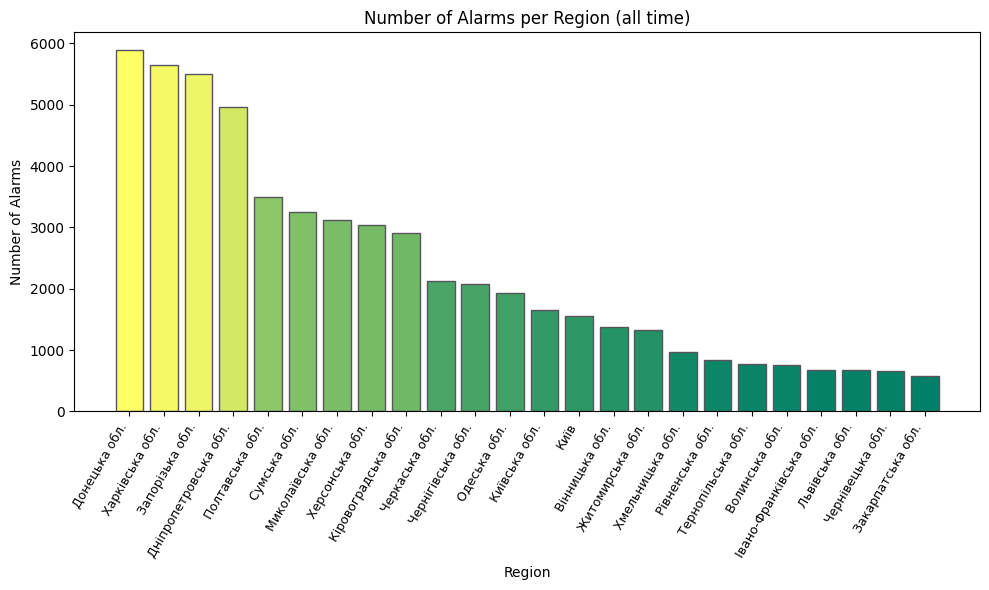

In [11]:
region_counts = alarms.groupby('region_city').size().sort_values(ascending=False)
region_names = region_counts.index
counts = region_counts.values

norm = plt.Normalize(counts.min(), counts.max())
colors = plt.cm.summer(norm(counts))

plt.figure(figsize=(10, 6))

plt.bar(region_names, counts, color=colors, edgecolor='#57545c', linewidth=1)
plt.xlabel('Region')
plt.ylabel('Number of Alarms')
plt.title('Number of Alarms per Region (all time)')
plt.xticks(rotation=60, ha='right', fontsize=9)
plt.tight_layout()
plt.show()

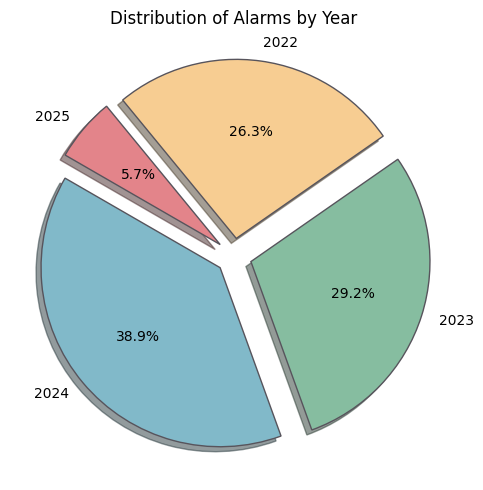

In [12]:
year_data = alarms['start_year'].value_counts()
plt.figure(figsize=(5, 5))
year_data.plot(kind='pie',
               explode=[0.1]*len(year_data),
               autopct='%1.1f%%',
               startangle=150,
               colors=['#81b9c9', '#86bda0', '#f7cd92', '#e3848a'],
               shadow=True,
               wedgeprops={'edgecolor': '#57545c', 'linewidth': 1, 'linestyle': 'solid'})
plt.title('Distribution of Alarms by Year')
plt.ylabel('')
plt.tight_layout()
plt.show()

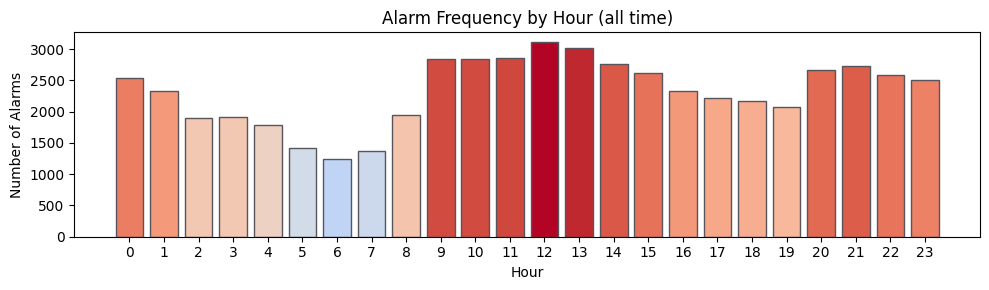

In [13]:
hour_data = alarms.groupby('start_hour').size()
colors = plt.cm.coolwarm(hour_data.values / hour_data.max())

plt.figure(figsize=(10, 3))
plt.bar(hour_data.index, hour_data.values, color=colors, edgecolor='#57545c', linewidth=1)
plt.title('Alarm Frequency by Hour (all time)')
plt.xlabel('Hour')
plt.ylabel('Number of Alarms')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

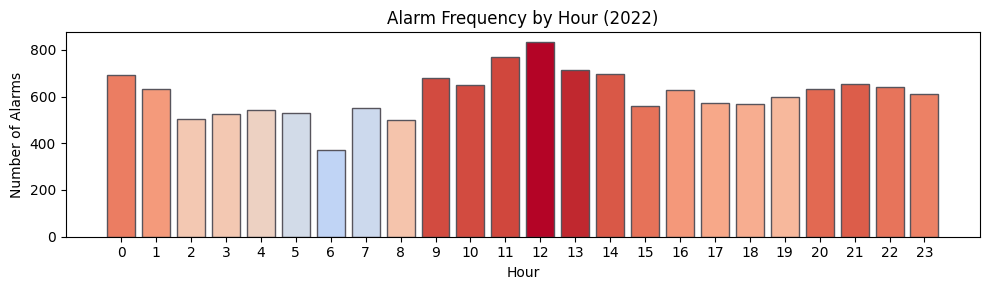

In [14]:
hour_data = alarms.where(alarms['start_year'] == 2022).groupby('start_hour').size()
plt.figure(figsize=(10, 3))
plt.bar(hour_data.index, hour_data.values, color=colors, edgecolor='#57545c', linewidth=1)
plt.title('Alarm Frequency by Hour (2022)')
plt.xlabel('Hour')
plt.ylabel('Number of Alarms')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

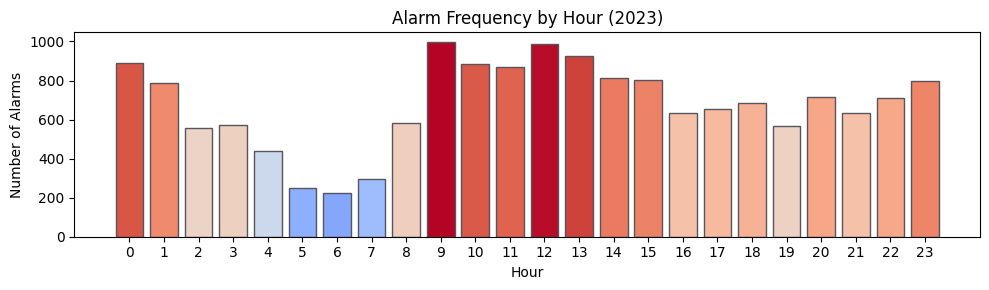

In [15]:
hour_data = alarms.where(alarms['start_year'] == 2023).groupby('start_hour').size()
colors = plt.cm.coolwarm(hour_data.values / hour_data.max())

plt.figure(figsize=(10, 3))
plt.bar(hour_data.index, hour_data.values, color=colors, edgecolor='#57545c', linewidth=1)
plt.title('Alarm Frequency by Hour (2023)')
plt.xlabel('Hour')
plt.ylabel('Number of Alarms')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

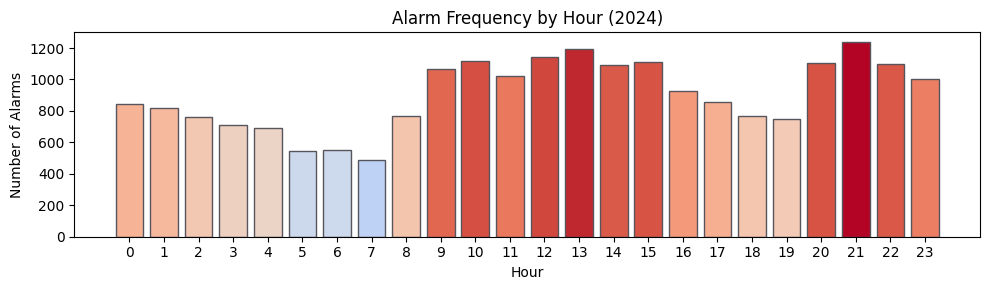

In [16]:
hour_data = alarms.where(alarms['start_year'] == 2024).groupby('start_hour').size()
colors = plt.cm.coolwarm(hour_data.values / hour_data.max())

plt.figure(figsize=(10, 3))
plt.bar(hour_data.index, hour_data.values, color=colors, edgecolor='#57545c', linewidth=1)
plt.title('Alarm Frequency by Hour (2024)')
plt.xlabel('Hour')
plt.ylabel('Number of Alarms')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

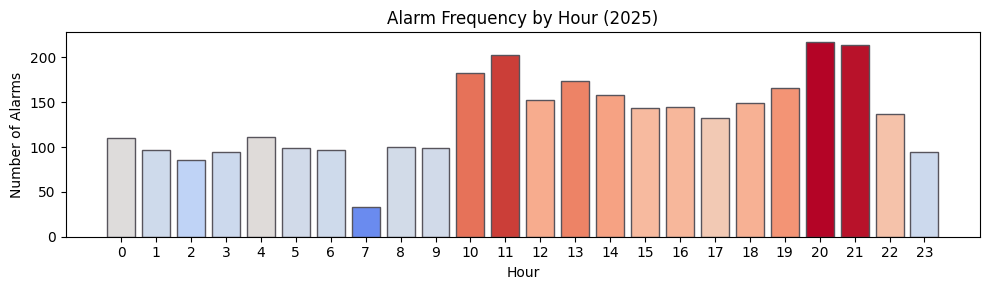

In [17]:
hour_data = alarms.where(alarms['start_year'] == 2025).groupby('start_hour').size()
colors = plt.cm.coolwarm(hour_data.values / hour_data.max())

plt.figure(figsize=(10, 3))
plt.bar(hour_data.index, hour_data.values, color=colors, edgecolor='#57545c', linewidth=1)
plt.title('Alarm Frequency by Hour (2025)')
plt.xlabel('Hour')
plt.ylabel('Number of Alarms')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

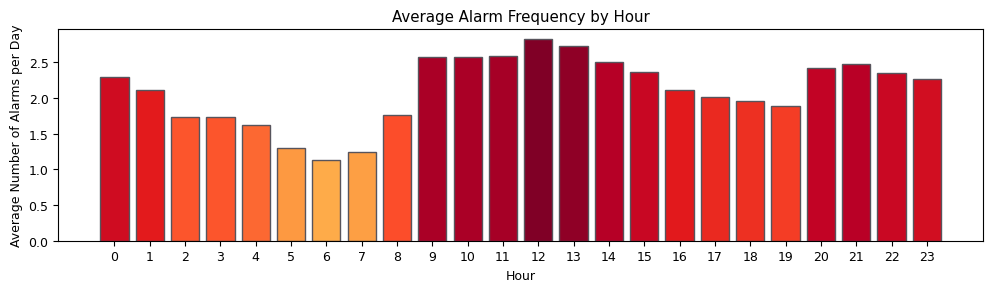

In [31]:
num_days = alarms['start'].dt.date.nunique()  # pd number of unique

hour_data = alarms.groupby('start_hour').size() / num_days
colors = plt.cm.YlOrRd(hour_data.values / hour_data.max())

plt.figure(figsize=(10, 3))
plt.bar(hour_data.index, hour_data.values, color=colors, edgecolor='#57545c', linewidth=1)
plt.title('Average Alarm Frequency by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of Alarms per Day')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

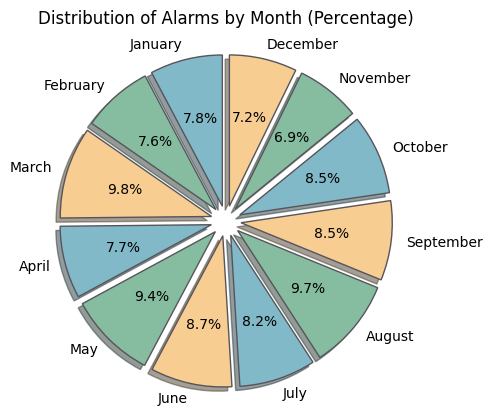

In [18]:

monthly_counts = alarms['start_month'].value_counts()
monthly_counts.index = pd.to_datetime(monthly_counts.index, format='%B')
monthly_counts = monthly_counts.sort_index() 
monthly_counts.index = monthly_counts.index.strftime('%B')

plt.figure(figsize=(5, 5))
monthly_counts.plot(kind='pie',
                  explode=[0.1]*len(monthly_counts),
                  autopct='%1.1f%%',
                  startangle=90,
                  colors=['#81b9c9', '#86bda0', '#f7cd92'],
                  shadow=True,
                  wedgeprops={'edgecolor': '#57545c', 'linewidth': 1, 'linestyle': 'solid'})

plt.title('Distribution of Alarms by Month (Percentage)')
plt.ylabel('')
plt.tight_layout()
plt.show()

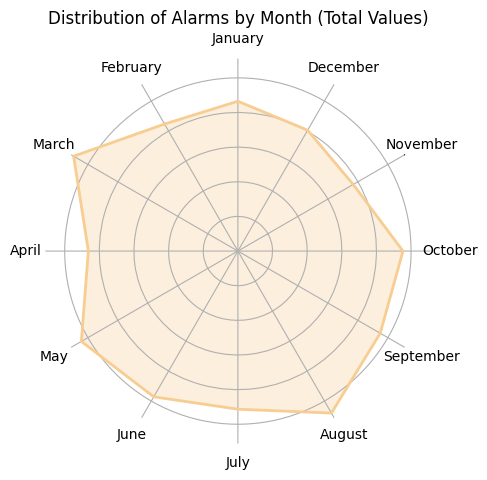

In [19]:
months = alarms['start_month'].unique()
counts = [alarms[alarms['start_month'] == month].shape[0] for month in months]

angles = [n / float(len(months)) * 2 * 3.1416 for n in range(len(months))]
angles = [(angle + 3.1416 / 2) % (2 * 3.1416) for angle in angles]

counts += counts[:1]  
angles += angles[:1]

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.plot(angles, counts, linewidth=2, linestyle='solid', color='#f7cd92')
ax.fill(angles, counts, alpha=0.3, color='#f7cd92')

ax.set_yticklabels([]) 
ax.set_xticks(angles[:-1])
ax.set_xticklabels(months, rotation=45)
ax.set_theta_offset(3.1416 / 6)

plt.title('Distribution of Alarms by Month (Total Values)')
plt.show()


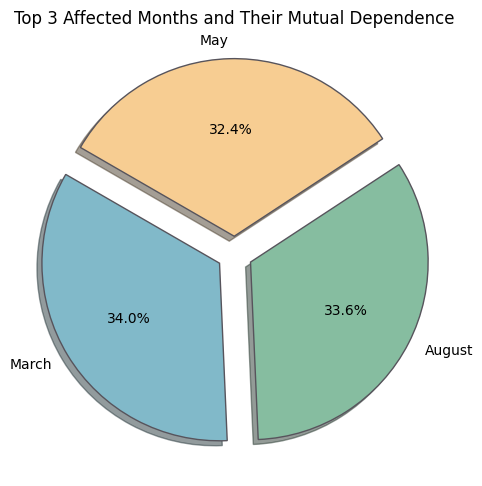

In [20]:
monthly_counts = alarms['start_month'].value_counts()
top_3_months = monthly_counts.nlargest(3)

plt.figure(figsize=(5, 5))
top_3_months.plot(kind='pie',
                  explode=[0.1]*len(top_3_months),
                  autopct='%1.1f%%',
                  startangle=150,
                  colors=['#81b9c9', '#86bda0', '#f7cd92'],
                  shadow=True,
                  wedgeprops={'edgecolor': '#57545c', 'linewidth': 1, 'linestyle': 'solid'})

plt.title('Top 3 Affected Months and Their Mutual Dependence')
plt.ylabel('')
plt.tight_layout()
plt.show()

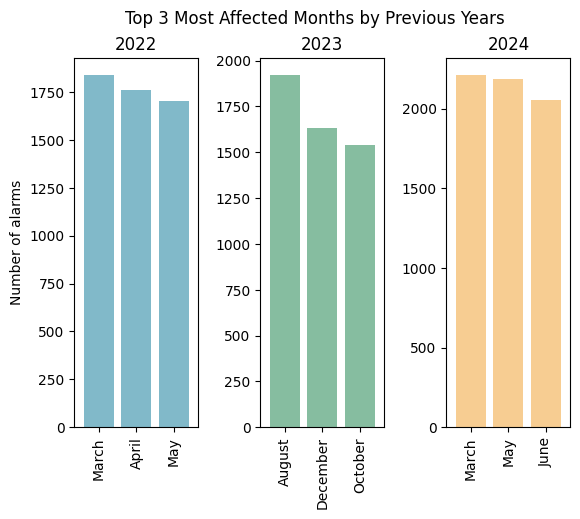

In [21]:
# most popular alarm start month each year all regions
f, ax = plt.subplots(nrows=1,ncols=3)
colors = ['#81b9c9', '#86bda0', '#f7cd92']
for i, year in enumerate([2022, 2023, 2024]):
    top_months = alarms.where(alarms['start_year'] == year).groupby('start_month').size().nlargest(3)
    top_months.plot(kind='bar', width=0.8, ax=ax[i], color=colors[i], title=year)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Number of alarms')
    if i != 0:
        ax[i].set_ylabel('')
plt.subplots_adjust(wspace=0.5)
plt.suptitle('Top 3 Most Affected Months by Previous Years')
plt.rcParams.update({'font.size': 9})

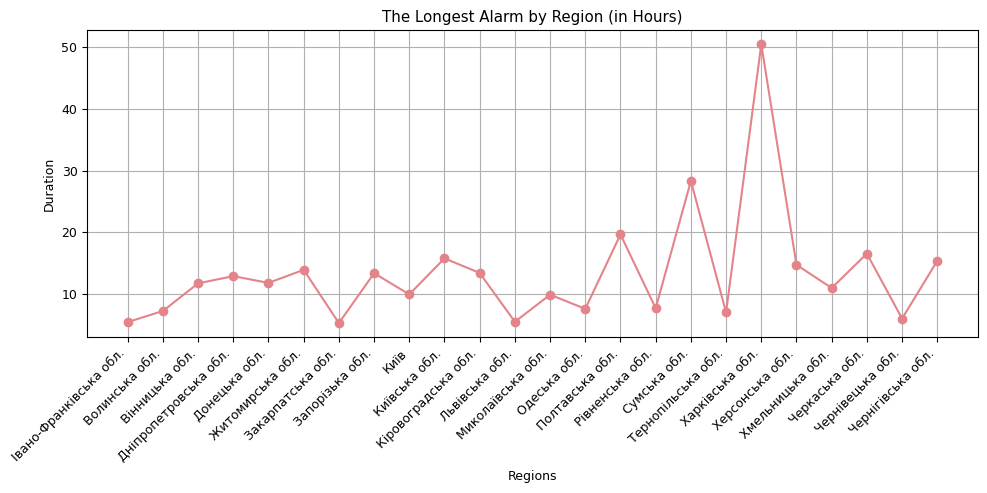

In [22]:
# the longest alarm by each region all time
alarms['duration'] = (alarms['end'] - alarms['start']).dt.total_seconds() / 3600
alarms = alarms[alarms['duration'] >= 0]
longest_alarm_per_region = alarms.groupby('region_city')['duration'].max()

plt.figure(figsize=(10, 5))
plt.plot(longest_alarm_per_region.index, longest_alarm_per_region.values, color='#e3848a', marker='o')

plt.title('The Longest Alarm by Region (in Hours)')
plt.xlabel('Regions')
plt.ylabel('Duration')

plt.xticks(ticks=range(len(longest_alarm_per_region.index)),
           labels=longest_alarm_per_region.index,
           rotation=45,
           ha='right',
           fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()


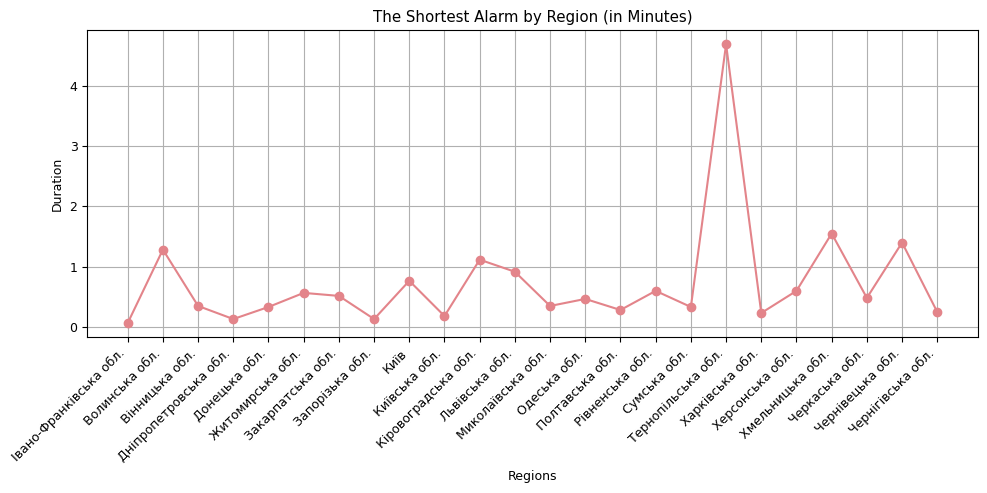

In [23]:
# the shortest
alarms = alarms.copy()
alarms['duration_in_min'] = (alarms['end'] - alarms['start']).dt.total_seconds() / 60
shortest_alarm_per_region = alarms.groupby('region_city')['duration_in_min'].min()

plt.figure(figsize=(10, 5))
plt.plot(shortest_alarm_per_region.index, shortest_alarm_per_region.values, color='#e3848a', marker='o')

plt.title('The Shortest Alarm by Region (in Minutes)')
plt.xlabel('Regions')
plt.ylabel('Duration')

plt.xticks(ticks=range(len(shortest_alarm_per_region.index)),
           labels=shortest_alarm_per_region.index,
           rotation=45,
           ha='right',
           fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()



In [24]:
alarms.to_parquet('alarms.parquet')